In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.shape

(1025, 14)

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploratory Data Analysis

In [39]:
plt.style.use('fivethirtyeight')

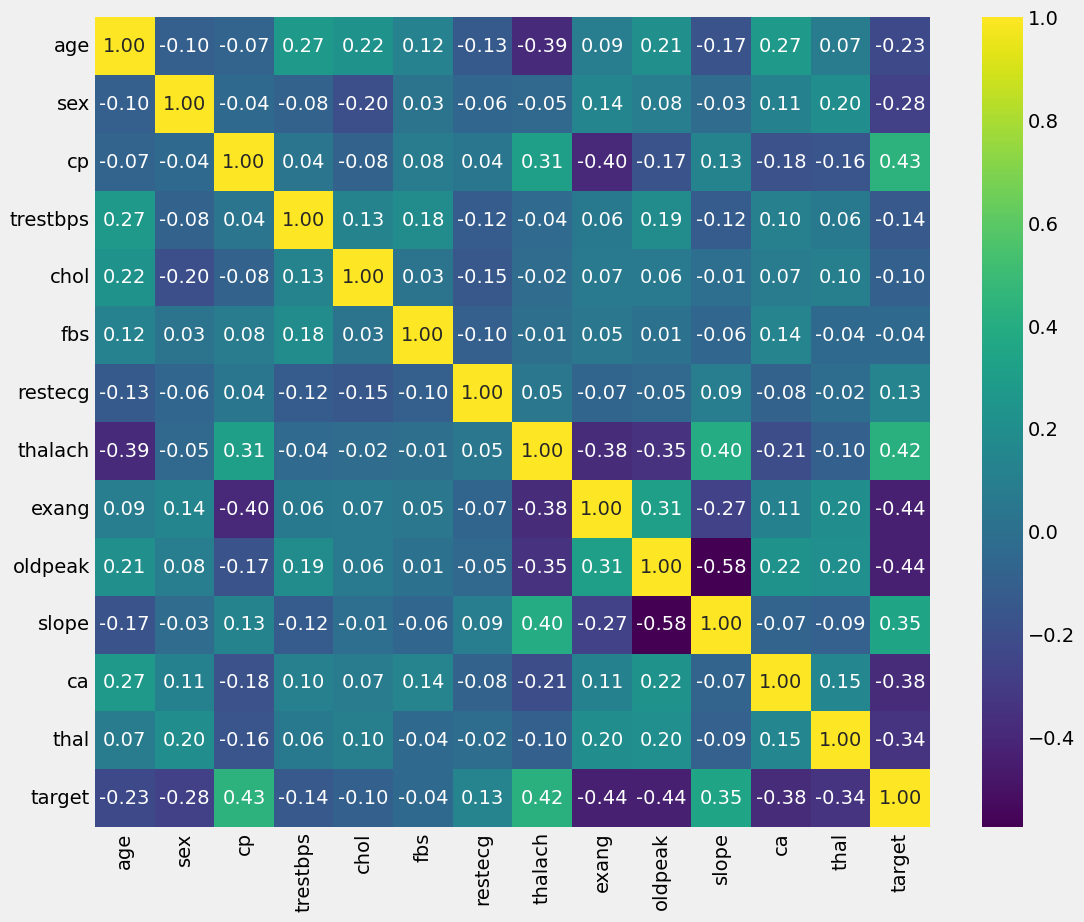

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,fmt = ".2f", cmap='viridis')
plt.show()

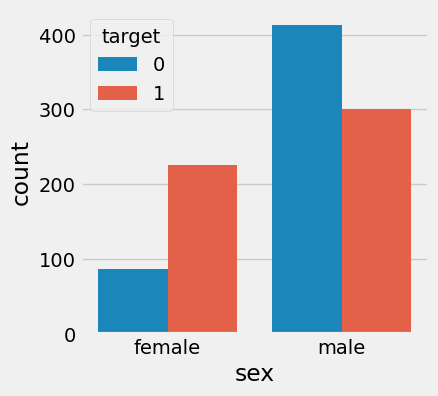

In [45]:
plt.figure(figsize=(4,4))
sns.countplot(x=data.sex, hue=data.target)
x=[1,0]
labels=['male','female']
plt.xticks(x, labels)
plt.show()

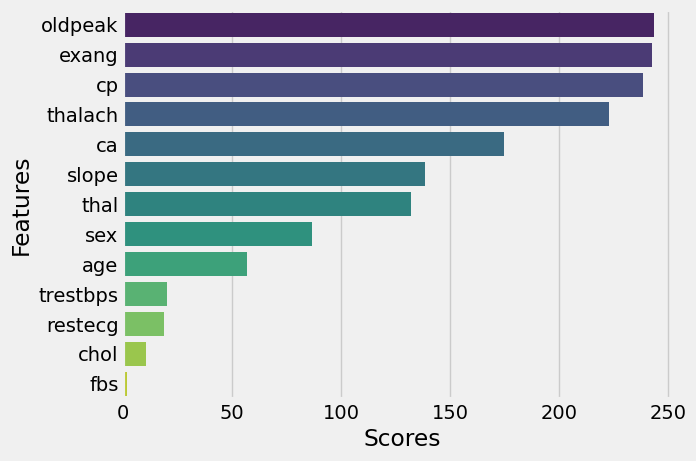

In [78]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=13).fit(x,y)
scores=selector.scores_
selected_features = pd.DataFrame({'Features':x.columns, 'Scores':scores})
selected_features=selected_features.sort_values(by='Scores',ascending=False)
sns.barplot(x='Scores', y='Features', data=selected_features, palette='viridis')
plt.show()

### Data Splitting

In [46]:
x=data.drop(['target'],axis=1)
y=data.target
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=42)

### Data Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain_scaled = s.fit_transform(xtrain)
xtest_scaled = s.fit_transform(xtest)

### Applying KNN Model

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
parameters={'n_neighbors':[1,3,5,7,9]}
knn_cv=GridSearchCV(knn,parameters, cv=6)
knn_cv.fit(xtrain_scaled, ytrain)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [62]:
predictions = knn_cv.predict(xtest_scaled)

### Performance of the model

In [79]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model:', round(accuracy_score(ytest,predictions)*100,2))

Accuracy of the model: 98.54


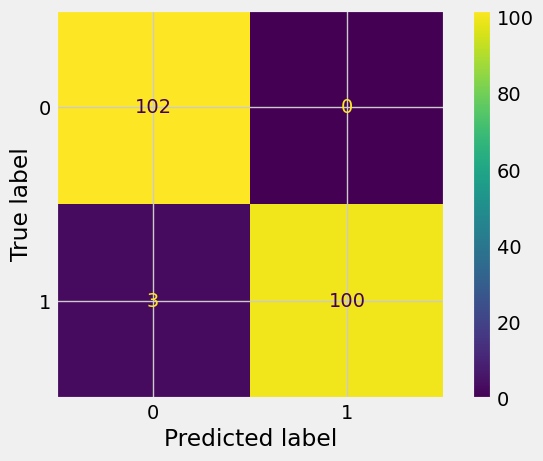

In [96]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, predictions)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()